#### Imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from vega_datasets import data

# Exercises

Use the above dataset for the following exercises:

In [4]:
df = data.sf_temps()

In [5]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [7]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [8]:
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [10]:
df = df.sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [14]:
df_daily = df.resample('D').mean()
df_daily.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


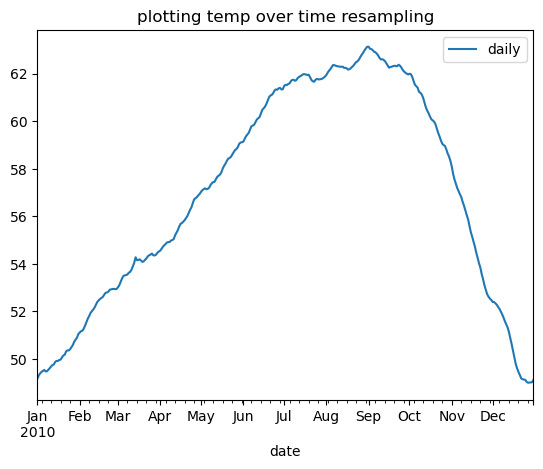

In [15]:
# plt.figure(figsize=(14,10))

df_daily.temp.plot(label='daily')

plt.title('plotting temp over time resampling')
plt.legend()
plt.show()

2. Write the code necessary to visualize the minimum temperature over time.

In [16]:
df.resample('D').min()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


In [17]:
df_daily_min = df.resample('D').min()
df_daily_min.head()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


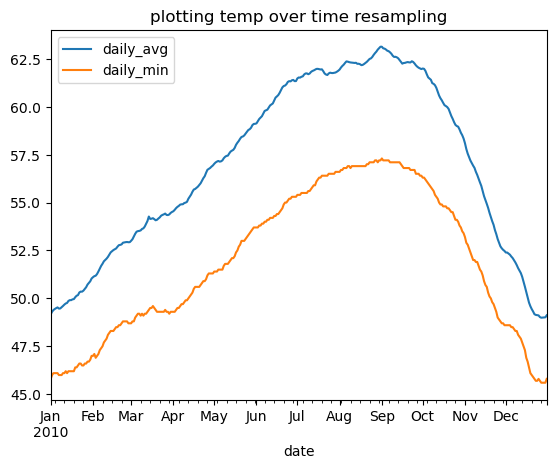

In [18]:
# plt.figure(figsize=(14,10))

df_daily.temp.plot(label='daily_avg')
df_daily_min.temp.plot(label='daily_min')
plt.title('plotting temp over time resampling')
plt.legend()
plt.show()

3. Write the code necessary to visualize the maximum temperature over time.

In [19]:
df_daily_max = df.resample('D').max()
df_daily_max.head()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


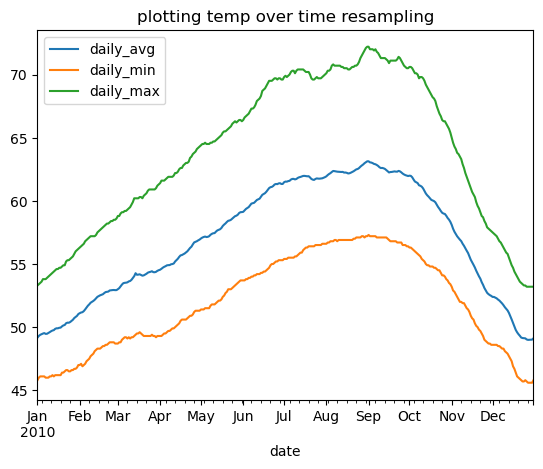

In [20]:
# plt.figure(figsize=(14,10))

df_daily.temp.plot(label='daily_avg')
df_daily_min.temp.plot(label='daily_min')
df_daily_max.temp.plot(label='daily_max')
plt.title('plotting temp over time resampling')
plt.legend()
plt.show()

4. Which month is the coldest, on average?

In [21]:
df.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='date', length=8759)

In [22]:
df['month'] = df.index.month_name()

In [23]:
df

,temp,month
date,,
2010-01-01 00:00:00,47.8,January
2010-01-01 01:00:00,47.4,January
2010-01-01 02:00:00,46.9,January
2010-01-01 03:00:00,46.5,January
2010-01-01 04:00:00,46.0,January
...,...,...
2010-12-31 19:00:00,50.4,December
2010-12-31 20:00:00,49.9,December
2010-12-31 21:00:00,49.4,December


In [27]:
df.groupby('month').mean().sort_values(by='temp')

,temp
month,
January,49.984140
December,50.498253
February,52.243899
March,53.956528
November,55.185139
April,55.633056
May,57.970968
October,60.253091
June,60.444722


***January is the coldest month on average***

5. Which month has the highest average temperature?


***September is the hottest month on average***

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [47]:
df2 = df.resample('D').agg(['min','max']).drop(columns='month')

In [48]:
df2

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [49]:
df2['delta'] = df2['temp']['max'] - df2['temp']['min']

In [50]:
df2

temp       delta
             min   max      
date                        
2010-01-01  45.8  53.3   7.5
2010-01-02  46.0  53.4   7.4
2010-01-03  46.1  53.5   7.4
2010-01-04  46.1  53.6   7.5
2010-01-05  46.1  53.8   7.7
...          ...   ...   ...
2010-12-27  45.6  53.2   7.6
2010-12-28  45.6  53.2   7.6
2010-12-29  45.6  53.2   7.6
2010-12-30  45.6  53.2   7.6
2010-12-31  45.8  53.2   7.4

[365 rows x 3 columns]

In [51]:
df2['month'] = df2.index.month_name()

In [52]:
df2

temp       delta     month
             min   max                
date                                  
2010-01-01  45.8  53.3   7.5   January
2010-01-02  46.0  53.4   7.4   January
2010-01-03  46.1  53.5   7.4   January
2010-01-04  46.1  53.6   7.5   January
2010-01-05  46.1  53.8   7.7   January
...          ...   ...   ...       ...
2010-12-27  45.6  53.2   7.6  December
2010-12-28  45.6  53.2   7.6  December
2010-12-29  45.6  53.2   7.6  December
2010-12-30  45.6  53.2   7.6  December
2010-12-31  45.8  53.2   7.4  December

[365 rows x 4 columns]

In [57]:
df2.groupby('month').delta.max().sort_values()

month
December      8.9
January       9.3
February      9.9
November     11.8
March        12.0
April        13.0
May          13.1
October      14.4
July         14.8
June         14.8
September    14.9
August       15.0
Name: delta, dtype: float64

In [59]:
df2.head()

temp       delta    month
             min   max               
date                                 
2010-01-01  45.8  53.3   7.5  January
2010-01-02  46.0  53.4   7.4  January
2010-01-03  46.1  53.5   7.4  January
2010-01-04  46.1  53.6   7.5  January
2010-01-05  46.1  53.8   7.7  January

***August - 15 degrees***

7. **Bonus:** Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

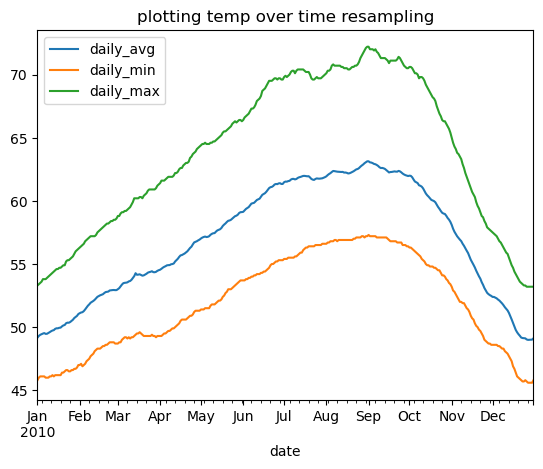

In [61]:
# plt.figure(figsize=(14,10))

df_daily.temp.plot(label='daily_avg')
df_daily_min.temp.plot(label='daily_min')
df_daily_max.temp.plot(label='daily_max')
plt.title('plotting temp over time resampling')
plt.legend()
plt.show()

### Use the above dataset for the following exercises:



In [62]:
sw = data.seattle_weather()

In [63]:
sw.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [64]:
sw.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [80]:
sw = sw.set_index('date')
sw.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


1. Which year and month combination has the highest amount of precipitation?

In [83]:
sw['month'] = sw.index.month_name()

In [102]:
sw['year'] = sw.index.year

In [136]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [142]:
precipitation_by_month = sw.groupby(['year', 'month']).precipitation.sum()
precipitation_by_month

year  month    
2012  April         68.1
      August         0.0
      December     174.0
      February      92.3
      January      173.3
      July          26.3
      June          75.1
      March        183.0
      May           52.2
      November     210.5
      October      170.3
      September      0.9
2013  April        149.6
      August        34.4
      December      42.4
      February      40.3
      January      105.7
      July           0.0
      June          33.1
      March         69.7
      May           60.5
      November      96.3
      October       39.2
      September    156.8
2014  April        106.1
      August        46.0
      December     121.8
      February     155.2
      January       94.0
      July          19.6
      June          18.8
      March        240.0
      May           80.0
      November     123.1
      October      171.5
      September     56.7
2015  April         51.6
      August        83.3
      December     284.5
      Feb

In [115]:
max_precip_idx = precipitation_by_month.idxmax()
highest_precipitation_year, highest_precipitation_month = max_precip_idx

In [116]:
highest_precipitation_year, highest_precipitation_month

(2015, 'December')

2. Visualize the amount of monthly precipitation over time.


In [117]:
sw.head()

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,January,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,January,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,January,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,January,2012


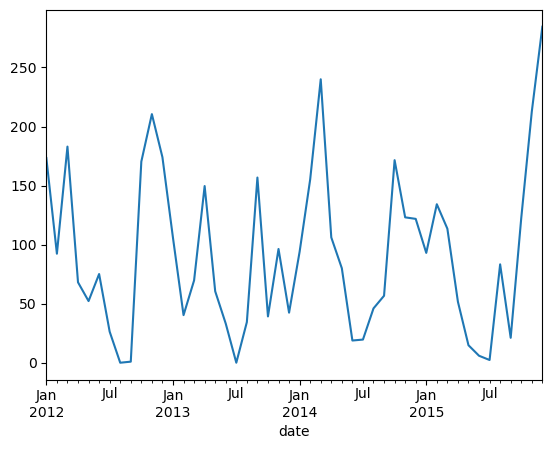

In [317]:
sw.resample('M').sum().precipitation.plot();

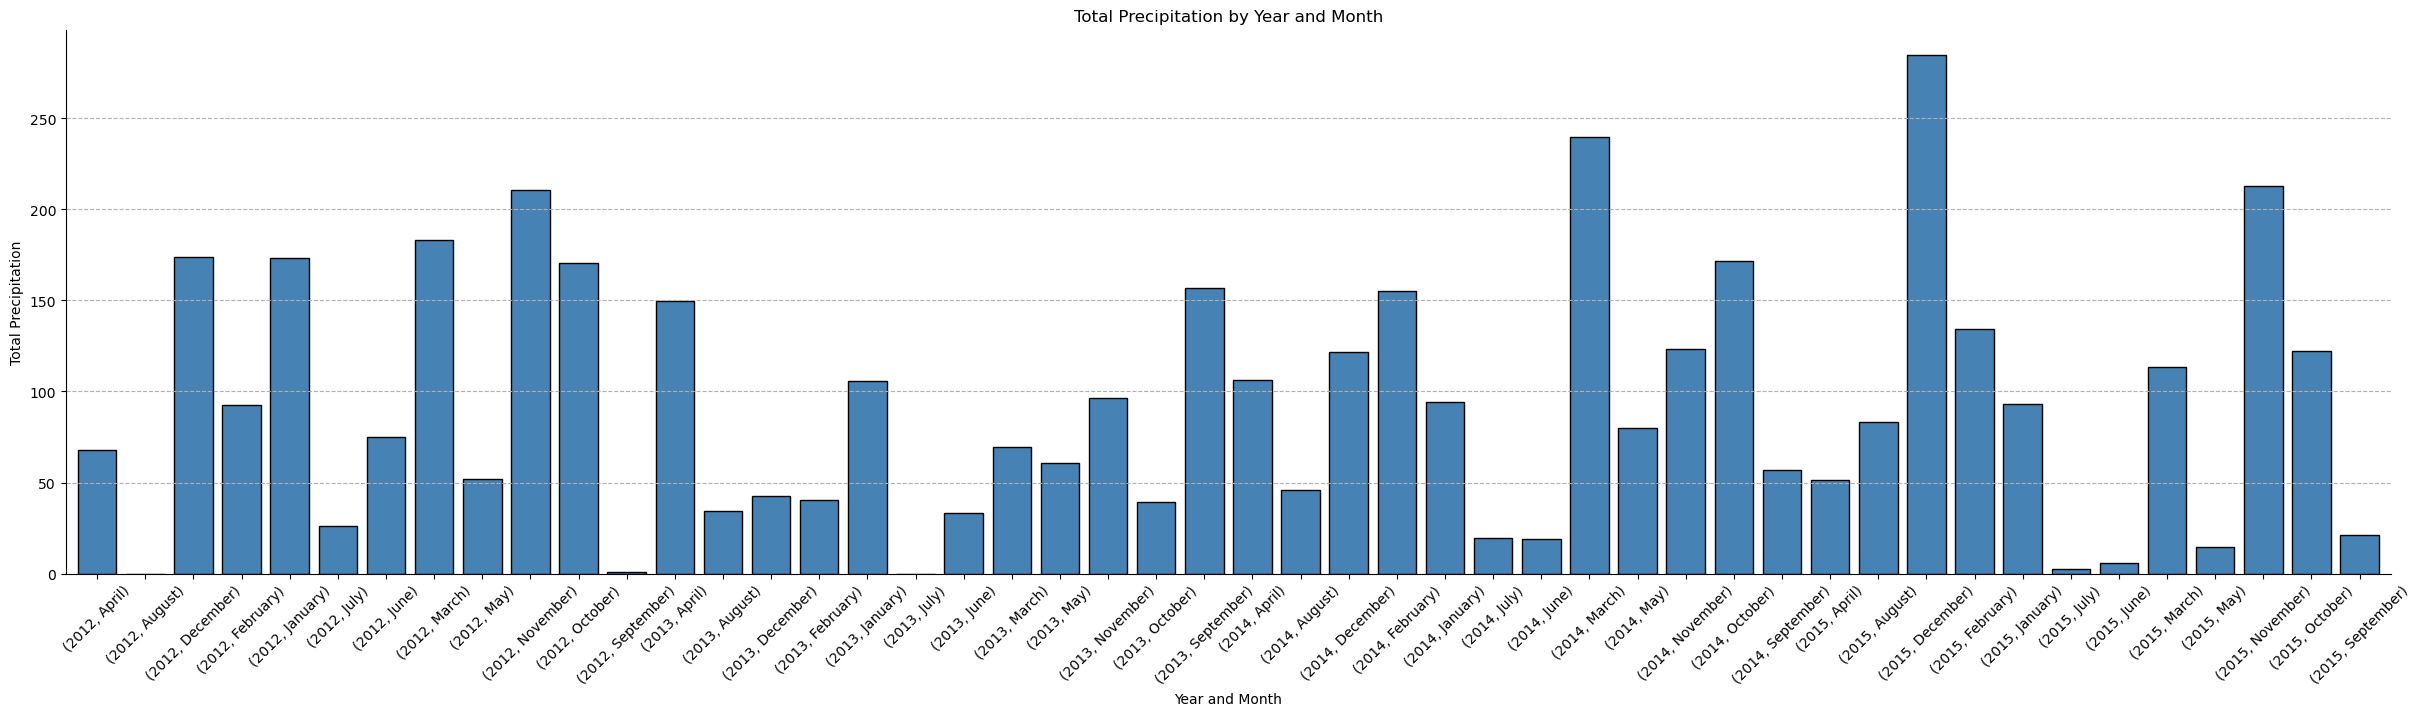

In [135]:
plt.figure(figsize=(30,8))
precipitation_by_month.plot(kind='bar', width=0.8, color='steelblue', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Total Precipitation by Year and Month')
plt.xlabel('Year and Month')
plt.ylabel('Total Precipitation')
plt.grid(axis='y', linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.subplots_adjust(bottom=0.2)


plt.show()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


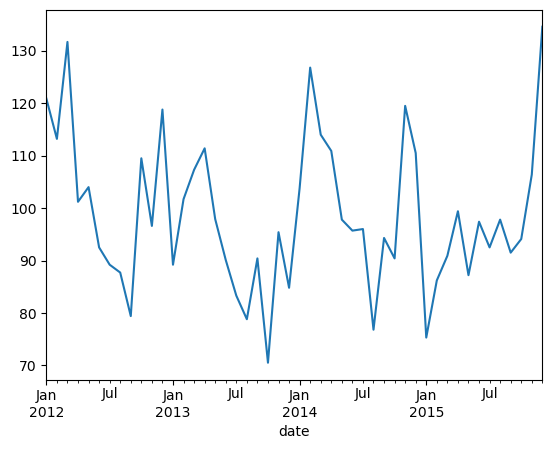

In [318]:
sw.resample('M').sum().wind.plot();

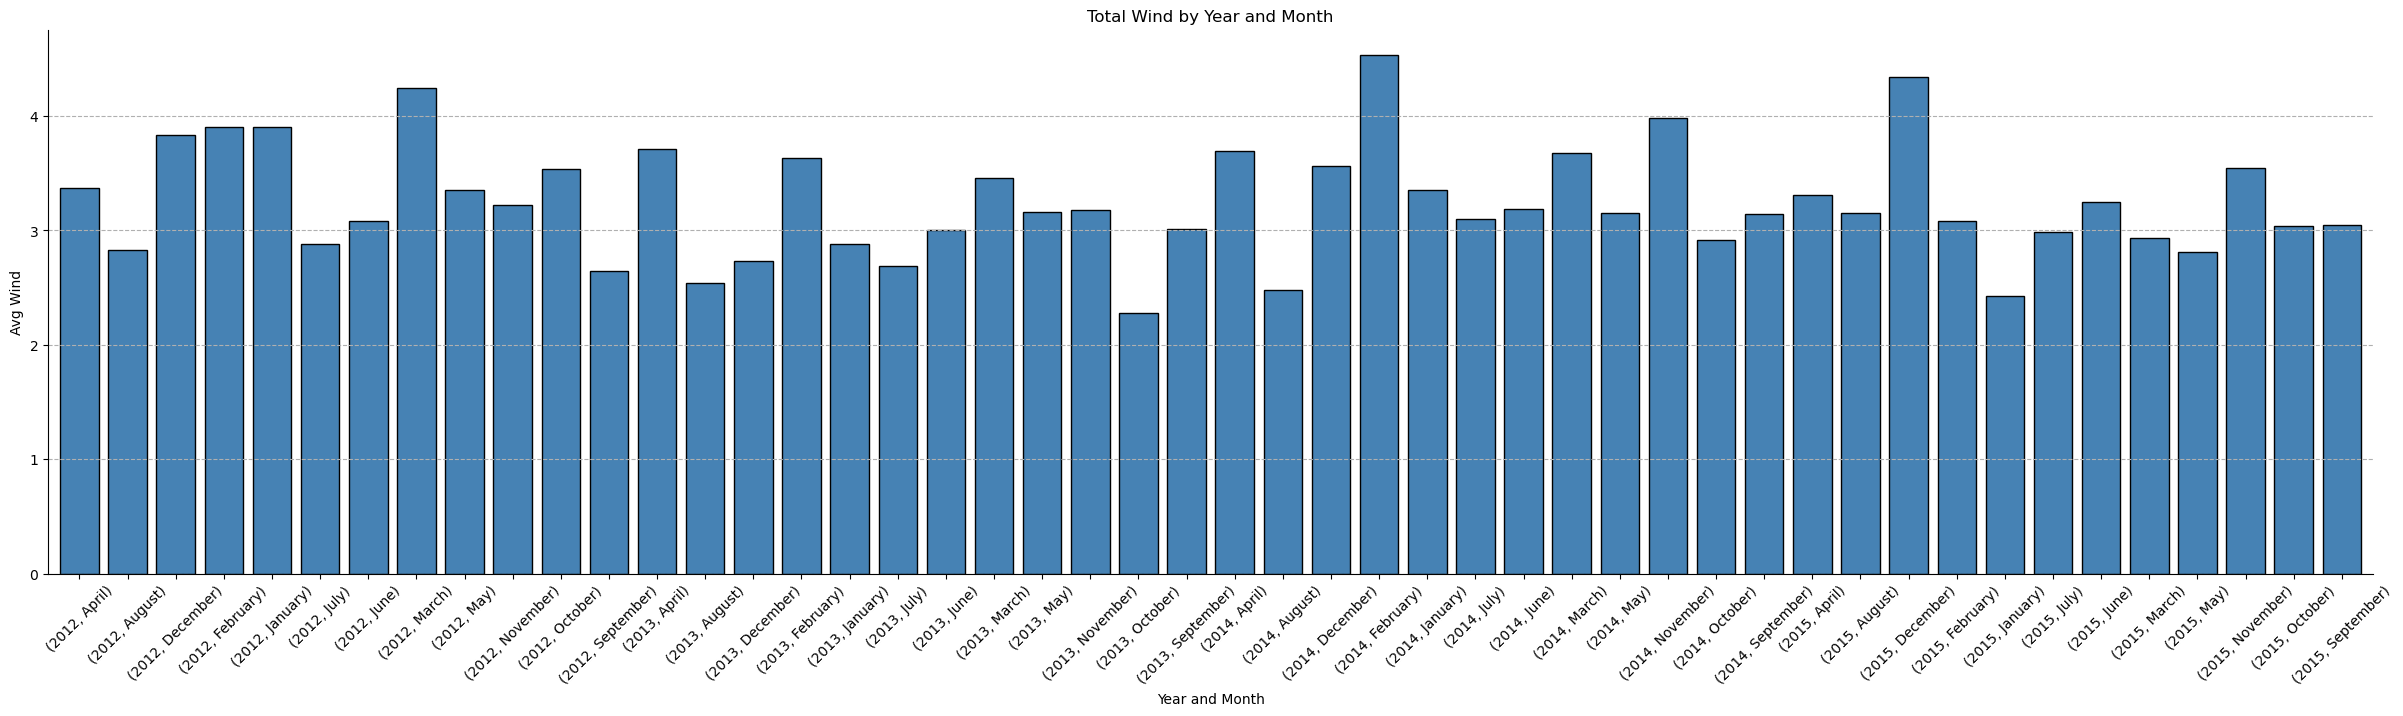

In [171]:
plt.figure(figsize=(30,8))
wind_by_month.plot(kind='bar', width=0.8, color='steelblue', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Total Wind by Year and Month')
plt.xlabel('Year and Month')
plt.ylabel('Avg Wind')
plt.grid(axis='y', linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.subplots_adjust(bottom=0.2)


plt.show()

4. Which year-month combination is the windiest?


In [322]:
wind_by_month = sw.groupby(['year', 'month']).wind.mean()
wind_by_month

year  month    
2012  April        3.373333
      August       2.829032
      December     3.832258
      February     3.903448
      January      3.900000
      July         2.877419
      June         3.083333
      March        4.248387
      May          3.354839
      November     3.220000
      October      3.532258
      September    2.646667
2013  April        3.713333
      August       2.541935
      December     2.735484
      February     3.632143
      January      2.877419
      July         2.687097
      June         3.003333
      March        3.461290
      May          3.158065
      November     3.180000
      October      2.274194
      September    3.013333
2014  April        3.696667
      August       2.477419
      December     3.564516
      February     4.528571
      January      3.348387
      July         3.096774
      June         3.190000
      March        3.677419
      May          3.154839
      November     3.983333
      October      2.916129
    

In [323]:
max_wind_idx = wind_by_month.idxmax()
highest_wind_year, highest_wind_month = max_wind_idx

In [325]:
highest_wind_year, highest_wind_month

(2014, 'February')

In [321]:
sw.resample('M').wind.mean().sort_values(ascending=False).head(1)

date
2014-02-28    4.528571
Name: wind, dtype: float64

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [194]:
sunniest_month = sw[sw.weather == 'sun'].groupby(['year', 'month']).weather.count()
sunniest_month

year  month    
2012  April         8
      August       24
      December      1
      February      8
      January       4
      July         12
      June         10
      March         6
      May          14
      November      2
      October      11
      September    18
2013  April        14
      August       27
      December     22
      February      2
      January       6
      July         27
      June         25
      March         9
      May          21
      November     17
      October      18
      September    17
2014  April        20
      August       23
      December     11
      February     11
      January      20
      July         25
      June         24
      March        11
      May          24
      November     14
      October      11
      September    17
2015  April        19
      August       20
      December      6
      February      9
      January       3
      July         25
      June         26
      March        16
      May       

In [196]:
sw[sw.weather == 'sun'].groupby(['year']).weather.count()

year
2012    118
2013    205
2014    211
2015    180
Name: weather, dtype: int64

6. In which month does it rain the most?


In [199]:
sw[sw.weather == 'rain'].groupby(['month']).weather.count().sort_values(ascending=False)

month
February     40
March        37
January      35
November     25
December     23
April        20
October      20
June         19
May          16
July         14
August        6
September     4
Name: weather, dtype: int64

7. Which month has the most number of days with a non-zero amount of precipitation?

In [207]:
sw[sw.precipitation != 0]

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain,January,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,January,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,January,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,January,2012
2012-01-06,2.5,4.4,2.2,2.2,rain,January,2012
...,...,...,...,...,...,...,...
2015-12-23,6.1,5.0,2.8,7.6,fog,December,2015
2015-12-24,2.5,5.6,2.2,4.3,fog,December,2015
2015-12-25,5.8,5.0,2.2,1.5,fog,December,2015


In [228]:
rain_days_in_month = sw[sw.precipitation != 0].groupby(['year', 'month']).precipitation.count()
rain_days_in_month

year  month    
2012  April        17
      December     27
      February     19
      January      22
      July          7
      June         14
      March        22
      May          10
      November     20
      October      16
      September     3
2013  April        16
      August        9
      December     14
      February     18
      January      17
      June         10
      March        15
      May          12
      November     15
      October      12
      September    14
2014  April        13
      August        7
      December     15
      February     19
      January      13
      July          2
      June          9
      March        20
      May           8
      November     16
      October      19
      September     9
2015  April        13
      August        6
      December     25
      February     17
      January      14
      July          2
      June          4
      March        16
      May           4
      November     20
      October   

In [229]:
max_rain_idx = rain_days_in_month.idxmax()
most_rain_year, most_rain_month = max_rain_idx

In [230]:
most_rain_year, most_rain_month

(2012, 'December')

In [232]:
sw[sw.precipitation != 0].groupby(['month']).precipitation.count().sort_values(ascending=False)

month
December     81
February     73
March        73
November     71
January      66
October      61
April        59
June         37
September    35
May          34
August       22
July         11
Name: precipitation, dtype: int64

### Use the above dataset for the following exercises:



In [219]:
fl = data.flights_20k()

In [220]:
fl.shape

(20000, 5)

In [221]:
fl.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


1. Convert any negative delays to 0.


In [222]:
fl[fl.delay < 0]

,date,delay,distance,origin,destination
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
9,2001-01-27 07:00:00,-13,588,BNA,BWI
10,2001-01-02 11:40:00,-1,395,MDW,BNA
...,...,...,...,...,...
19981,2001-01-16 13:40:00,-8,223,BUR,LAS
19983,2001-01-26 13:50:00,-10,534,RDU,MCO
19989,2001-03-17 07:00:00,-15,256,LAS,PHX
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI


In [223]:
fl['delay'] = fl['delay'].clip(lower=0)

In [224]:
fl

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,0,1489,SEA,MCI
19997,2001-02-07 11:37:00,0,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [234]:
fl.dtypes

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object

2. Which hour of the day has the highest average delay?


In [236]:
fl['hour'] = fl.date.dt.hour

In [243]:
fl[fl.delay > 0].groupby('hour').delay.mean().sort_values(ascending=False)

hour
3     302.500000
1     170.000000
0     127.916667
23     84.960000
22     46.415385
21     36.202186
20     31.996820
19     28.660405
18     27.141802
17     24.415803
16     24.301700
15     24.049475
13     22.374793
14     21.138554
12     18.879937
11     17.733855
10     15.207207
9      14.907960
8      11.784783
7       9.967963
6       7.847896
5       4.750000
Name: delay, dtype: float64

3. Does the day of the week make a difference in the delay amount?


In [249]:
fl = fl.set_index('date')
fl

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21
...,...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK,15
2001-01-19 13:05:00,0,1489,SEA,MCI,13
2001-02-07 11:37:00,0,1848,MCO,PHX,11


In [251]:
fl['weekday'] = fl.index.day_name()

In [252]:
fl

,delay,distance,origin,destination,hour,weekday
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,21,Friday
...,...,...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK,15,Thursday
2001-01-19 13:05:00,0,1489,SEA,MCI,13,Friday
2001-02-07 11:37:00,0,1848,MCO,PHX,11,Wednesday


In [262]:
fl['dayofweek'] = fl.index.day_of_week

In [263]:
fl[fl.delay > 0].groupby('dayofweek').delay.mean().sort_values(ascending=False)

dayofweek
4    29.707182
3    24.890393
2    23.904996
6    22.077048
1    21.140351
5    20.707547
0    17.735880
Name: delay, dtype: float64

In [253]:
fl[fl.delay > 0].groupby('weekday').delay.mean().sort_values(ascending=False)

weekday
Friday       29.707182
Thursday     24.890393
Wednesday    23.904996
Sunday       22.077048
Tuesday      21.140351
Saturday     20.707547
Monday       17.735880
Name: delay, dtype: float64

4. Does the month make a difference in the delay amount?

In [255]:
fl['month'] = fl.index.month_name()

In [256]:
fl

,delay,distance,origin,destination,hour,weekday,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,January
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday,February
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday,January
2001-03-30 21:45:00,0,229,STL,IND,21,Friday,March
...,...,...,...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK,15,Thursday,March
2001-01-19 13:05:00,0,1489,SEA,MCI,13,Friday,January
2001-02-07 11:37:00,0,1848,MCO,PHX,11,Wednesday,February


In [257]:
fl[fl.delay > 0].groupby('month').delay.mean().sort_values(ascending=False)

month
February    25.241639
January     23.869863
March       21.332092
Name: delay, dtype: float64

## Bonus

Use the above dataset for the following exercises:

In [ ]:
data.iowa_electricity()

In [287]:
ie = data.iowa_electricity()

In [288]:
ie.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [289]:
ie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [290]:
ie.shape

(51, 3)

1. For each row, calculate the percentage of the year's total that energy source provided.


In [291]:
ie = ie.set_index('year')

In [298]:
ie

,source,net_generation,gen_year
year,,,
2001-01-01,Fossil Fuels,35361,2001
2002-01-01,Fossil Fuels,35991,2002
2003-01-01,Fossil Fuels,36234,2003
2004-01-01,Fossil Fuels,36205,2004
2005-01-01,Fossil Fuels,36883,2005
2006-01-01,Fossil Fuels,37014,2006
2007-01-01,Fossil Fuels,41389,2007
2008-01-01,Fossil Fuels,42734,2008
2009-01-01,Fossil Fuels,38620,2009


In [293]:
ie['gen_year'] = ie.index.year

In [294]:
ie.groupby('gen_year').net_generation.sum()

gen_year
2001    40651
2002    42528
2003    42107
2004    43236
2005    44145
2006    45473
2007    49778
2008    53086
2009    51859
2010    57509
2011    56371
2012    56675
2013    56670
2014    56854
2015    56653
2016    54381
2017    56476
Name: net_generation, dtype: int64

In [297]:
ie.net_generation

year
2001-01-01    35361
2002-01-01    35991
2003-01-01    36234
2004-01-01    36205
2005-01-01    36883
2006-01-01    37014
2007-01-01    41389
2008-01-01    42734
2009-01-01    38620
2010-01-01    42750
2011-01-01    39361
2012-01-01    37379
2013-01-01    34873
2014-01-01    35250
2015-01-01    32319
2016-01-01    28437
2017-01-01    29329
2001-01-01     3853
2002-01-01     4574
2003-01-01     3988
2004-01-01     4929
2005-01-01     4538
2006-01-01     5095
2007-01-01     4519
2008-01-01     5282
2009-01-01     4679
2010-01-01     4451
2011-01-01     5215
2012-01-01     4347
2013-01-01     5321
2014-01-01     4152
2015-01-01     5243
2016-01-01     4703
2017-01-01     5214
2001-01-01     1437
2002-01-01     1963
2003-01-01     1885
2004-01-01     2102
2005-01-01     2724
2006-01-01     3364
2007-01-01     3870
2008-01-01     5070
2009-01-01     8560
2010-01-01    10308
2011-01-01    11795
2012-01-01    14949
2013-01-01    16476
2014-01-01    17452
2015-01-01    19091
2016-01-01    2

2. Lineplot of generation over time, color by source

3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)


4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?


5. Is the total generation increasing over time?
    - How would you control for increasing consumption over time when considering how much energy is coming from each source?
    - express each number as a % of the year's total